# Telecom Churn Assignment

*by*

**Remella Satya Ramana Kumar**

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
#Basbic DataFrame Libraries
import pandas as pd
import numpy as np
import re

#Null Handling
import missingno as msno

#Scikit Library
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, precision_score, recall_score

#Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data= pd.read_csv("S:train.csv",low_memory = False)

In [15]:
data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


<Axes: >

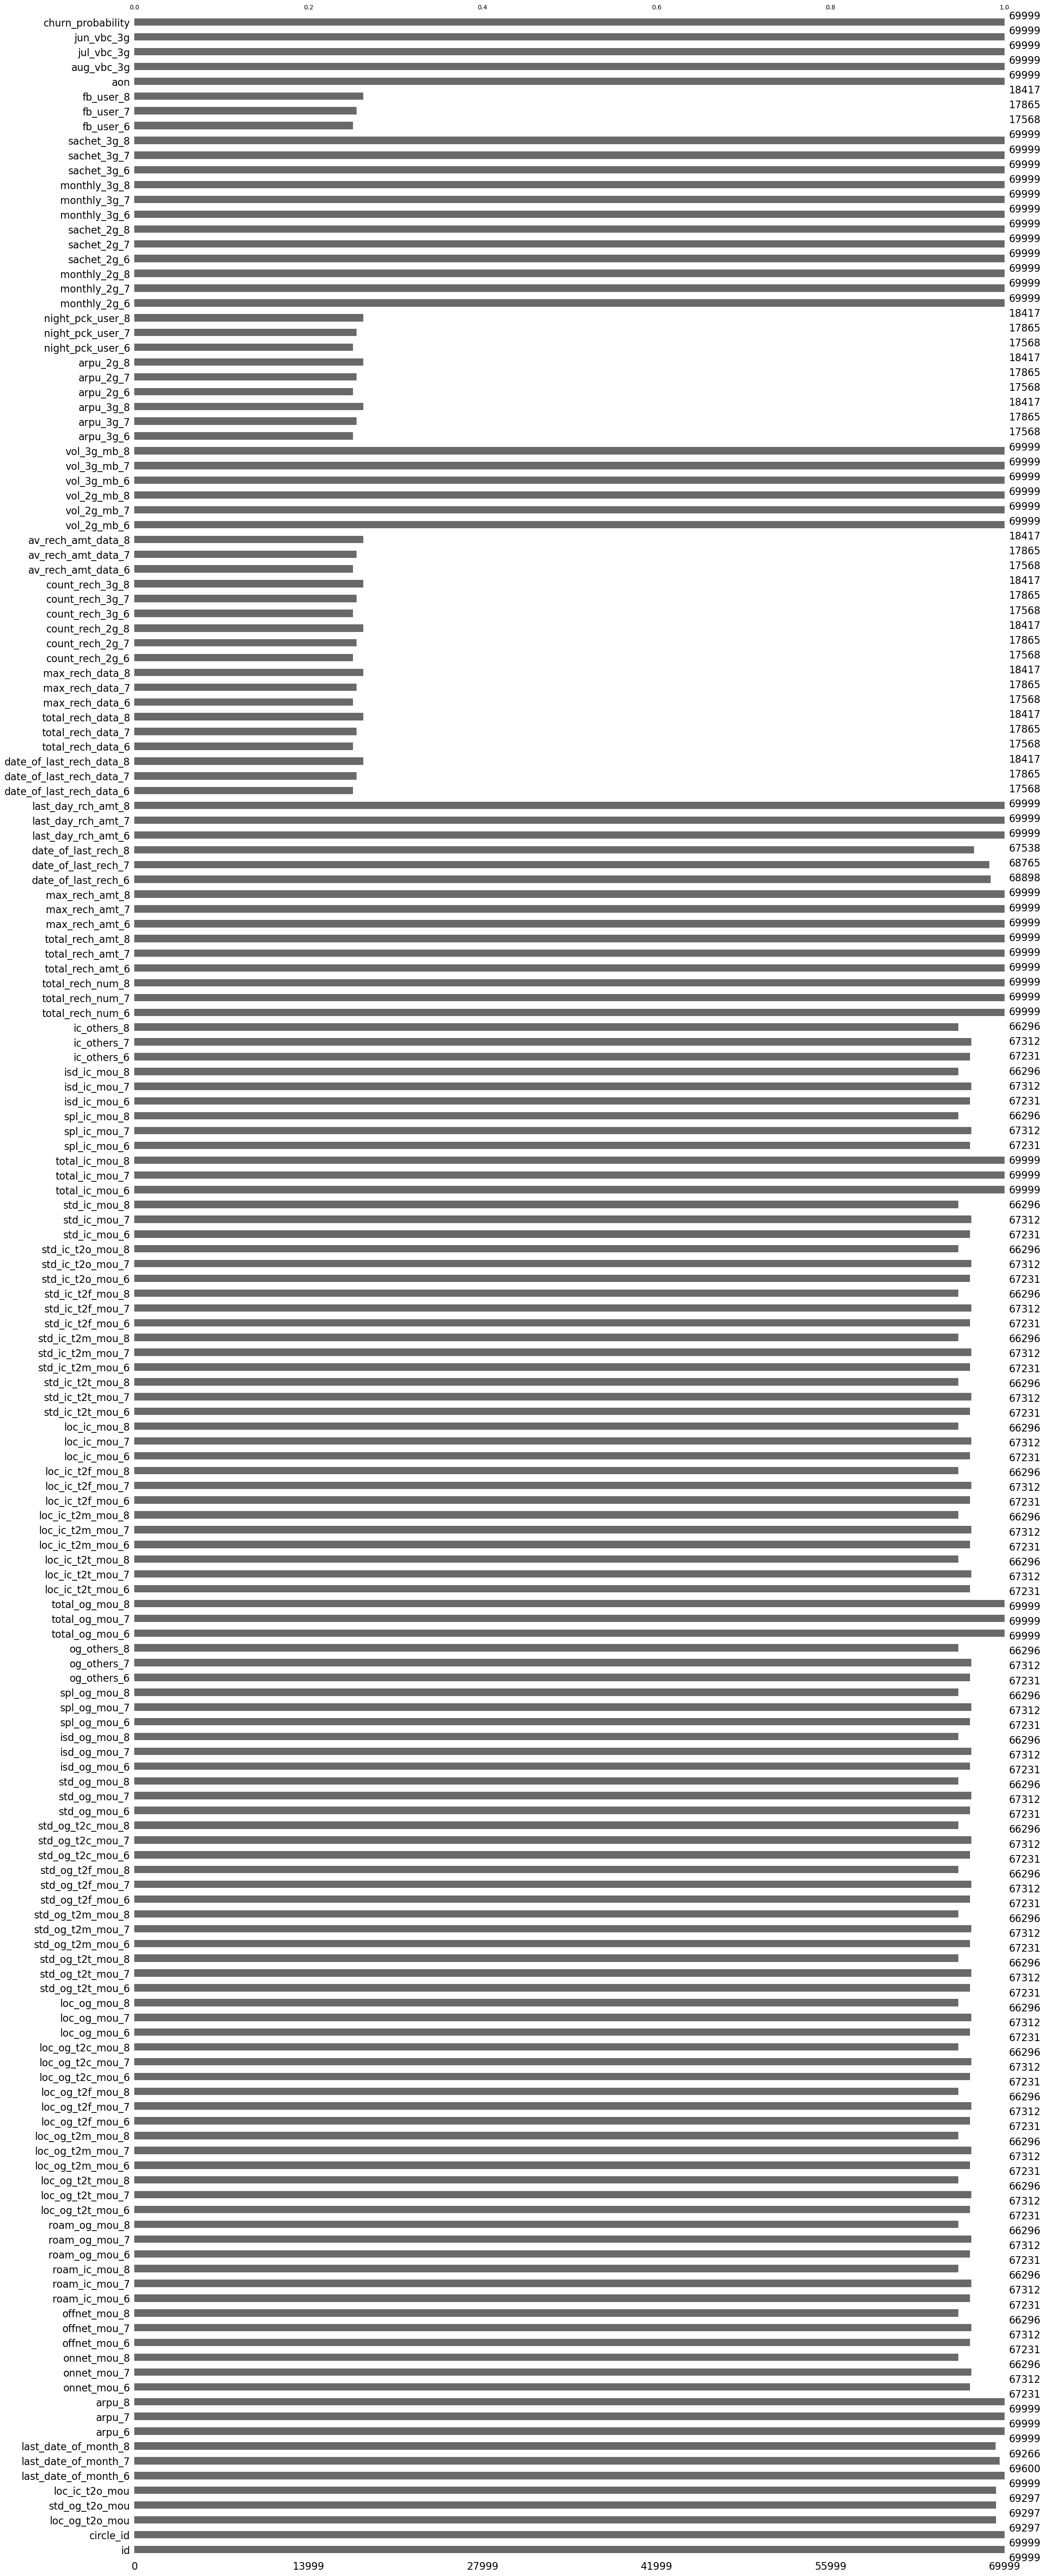

In [16]:
msno.bar(data)

In [17]:
data_dictionary = pd.read_csv("S:data_dictionary.csv",low_memory = False)

In [18]:
data_dictionary

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [19]:
ids = ['id']
total_amounts = [i for i in list(data.columns) if re.search('total.+amt',i)]
total_outgoing_minutes = [i for i in list(data.columns) if re.search('total.+og.+mou',i)]
volume = [i for i in list(data.columns) if re.search('vol',i)]
age_on_network = [i for i in list(data.columns) if re.search('aon',i)]

Facebook_User = [i for i in list(data.columns) if re.search('fb_user',i)]

Volumebased_cost = [i for i in list(data.columns) if re.search('vbc',i)]
Roam  = [i for i in list(data.columns) if re.search('roam',i)]
sachet = [i for i in list(data.columns) if re.search('sachet',i)]
max_recharge_data = [i for i in list(data.columns) if re.search('max.+rech.+data',i)]

#Storing them in a single flat list
variables = [*ids, 
             *total_amounts,
             *total_outgoing_minutes, 
             *volume,
             *age_on_network, 
             *Facebook_User,
             *Volumebased_cost,
             *Roam,
             *sachet,
             *max_recharge_data,
             'churn_probability']

data = data[variables].set_index('id')

In [20]:
data.axes

[Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                 9,
             ...
             69989, 69990, 69991, 69992, 69993, 69994, 69995, 69996, 69997,
             69998],
            dtype='int64', name='id', length=69999),
 Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
        'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'vol_2g_mb_6',
        'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
        'vol_3g_mb_8', 'aon', 'fb_user_6', 'fb_user_7', 'fb_user_8',
        'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'roam_ic_mou_6',
        'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7',
        'roam_og_mou_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
        'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'max_rech_data_6',
        'max_rech_data_7', 'max_rech_data_8', 'churn_probability'],
       dtype='object')]

In [21]:
data.shape

(69999, 35)

<Axes: >

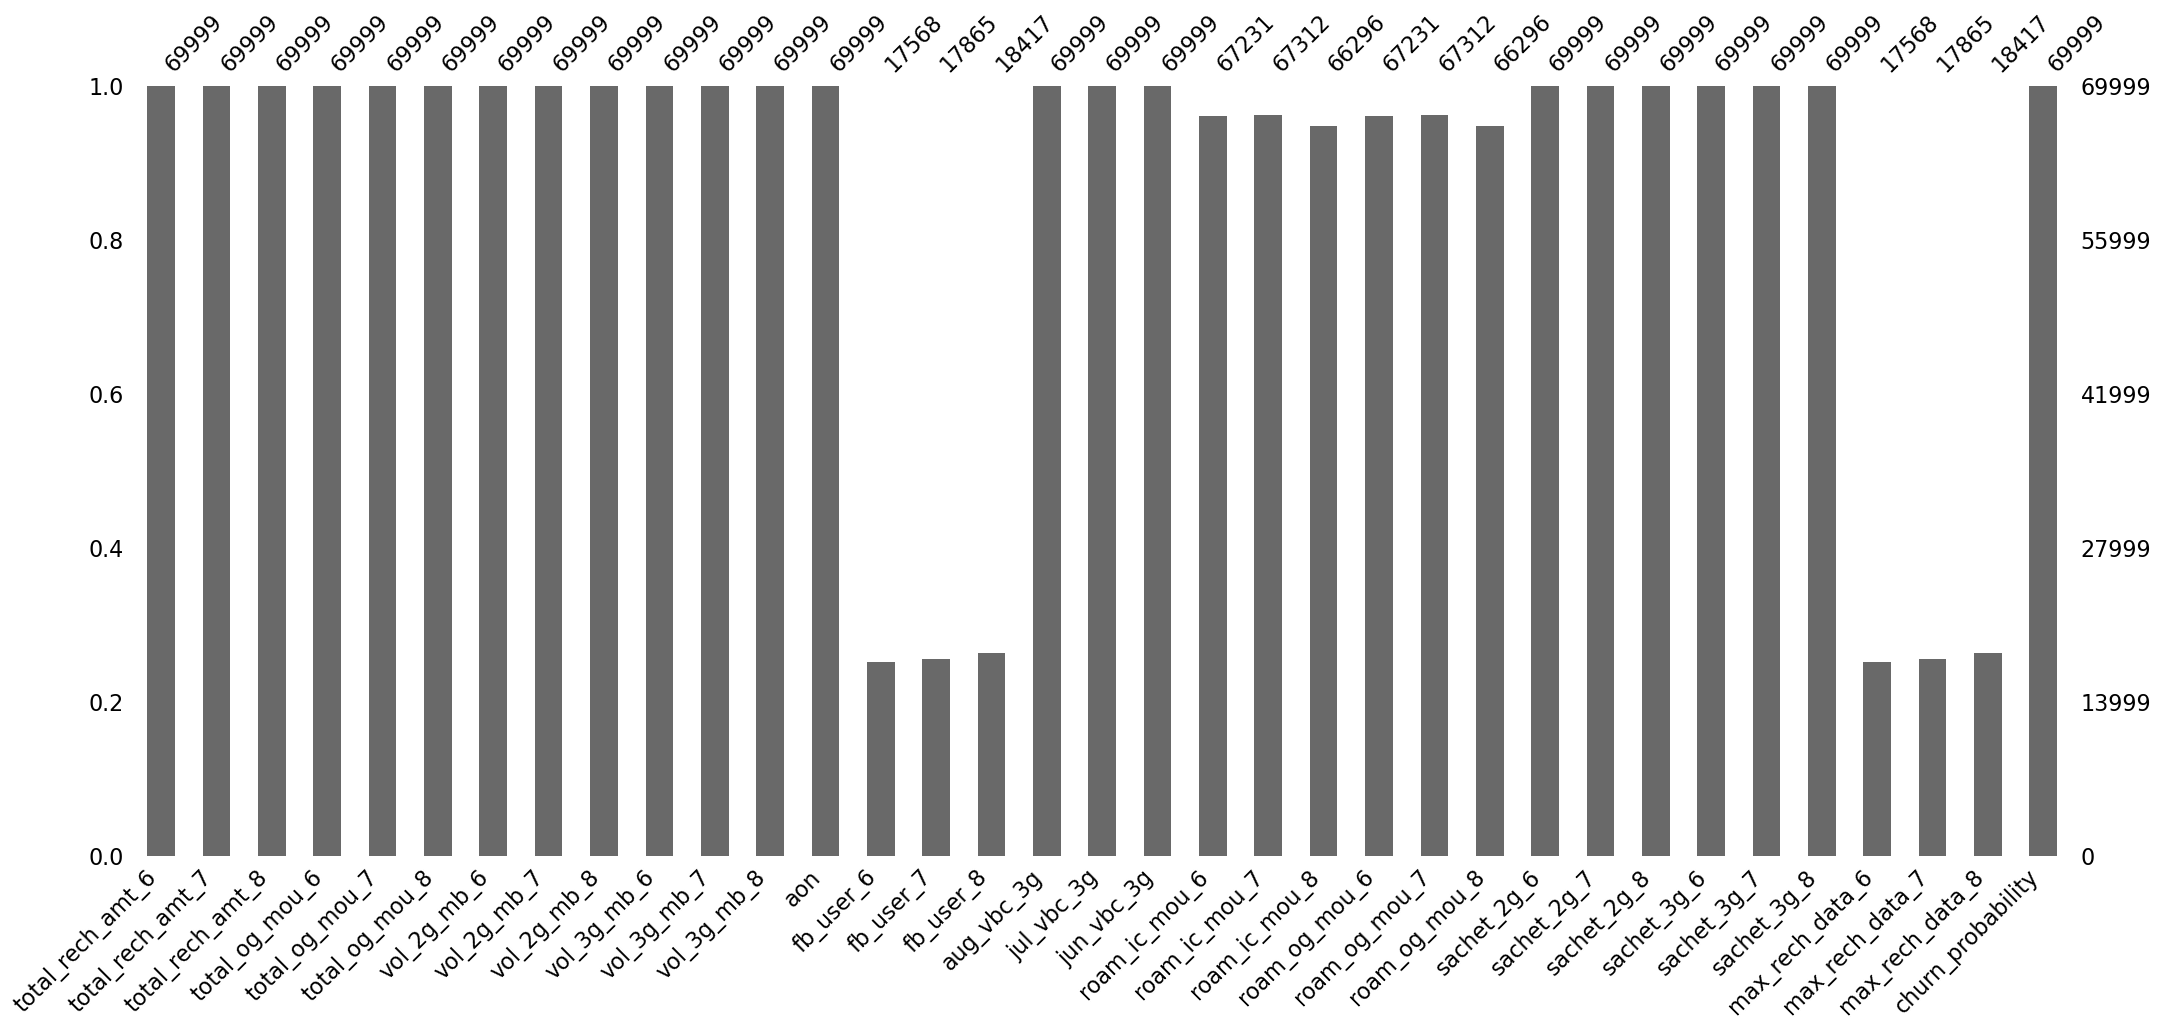

In [22]:
msno.bar(data)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_rech_amt_6   69999 non-null  int64  
 1   total_rech_amt_7   69999 non-null  int64  
 2   total_rech_amt_8   69999 non-null  int64  
 3   total_og_mou_6     69999 non-null  float64
 4   total_og_mou_7     69999 non-null  float64
 5   total_og_mou_8     69999 non-null  float64
 6   vol_2g_mb_6        69999 non-null  float64
 7   vol_2g_mb_7        69999 non-null  float64
 8   vol_2g_mb_8        69999 non-null  float64
 9   vol_3g_mb_6        69999 non-null  float64
 10  vol_3g_mb_7        69999 non-null  float64
 11  vol_3g_mb_8        69999 non-null  float64
 12  aon                69999 non-null  int64  
 13  fb_user_6          17568 non-null  float64
 14  fb_user_7          17865 non-null  float64
 15  fb_user_8          18417 non-null  float64
 16  aug_vbc_3g         699

# Test Train Split

In [24]:
y = data.pop('churn_probability')

In [25]:
X = data

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7 ,test_size=0.3, random_state=100)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(48999, 34)
(21000, 34)
(48999,)
(21000,)


# Null Handling

<Axes: >

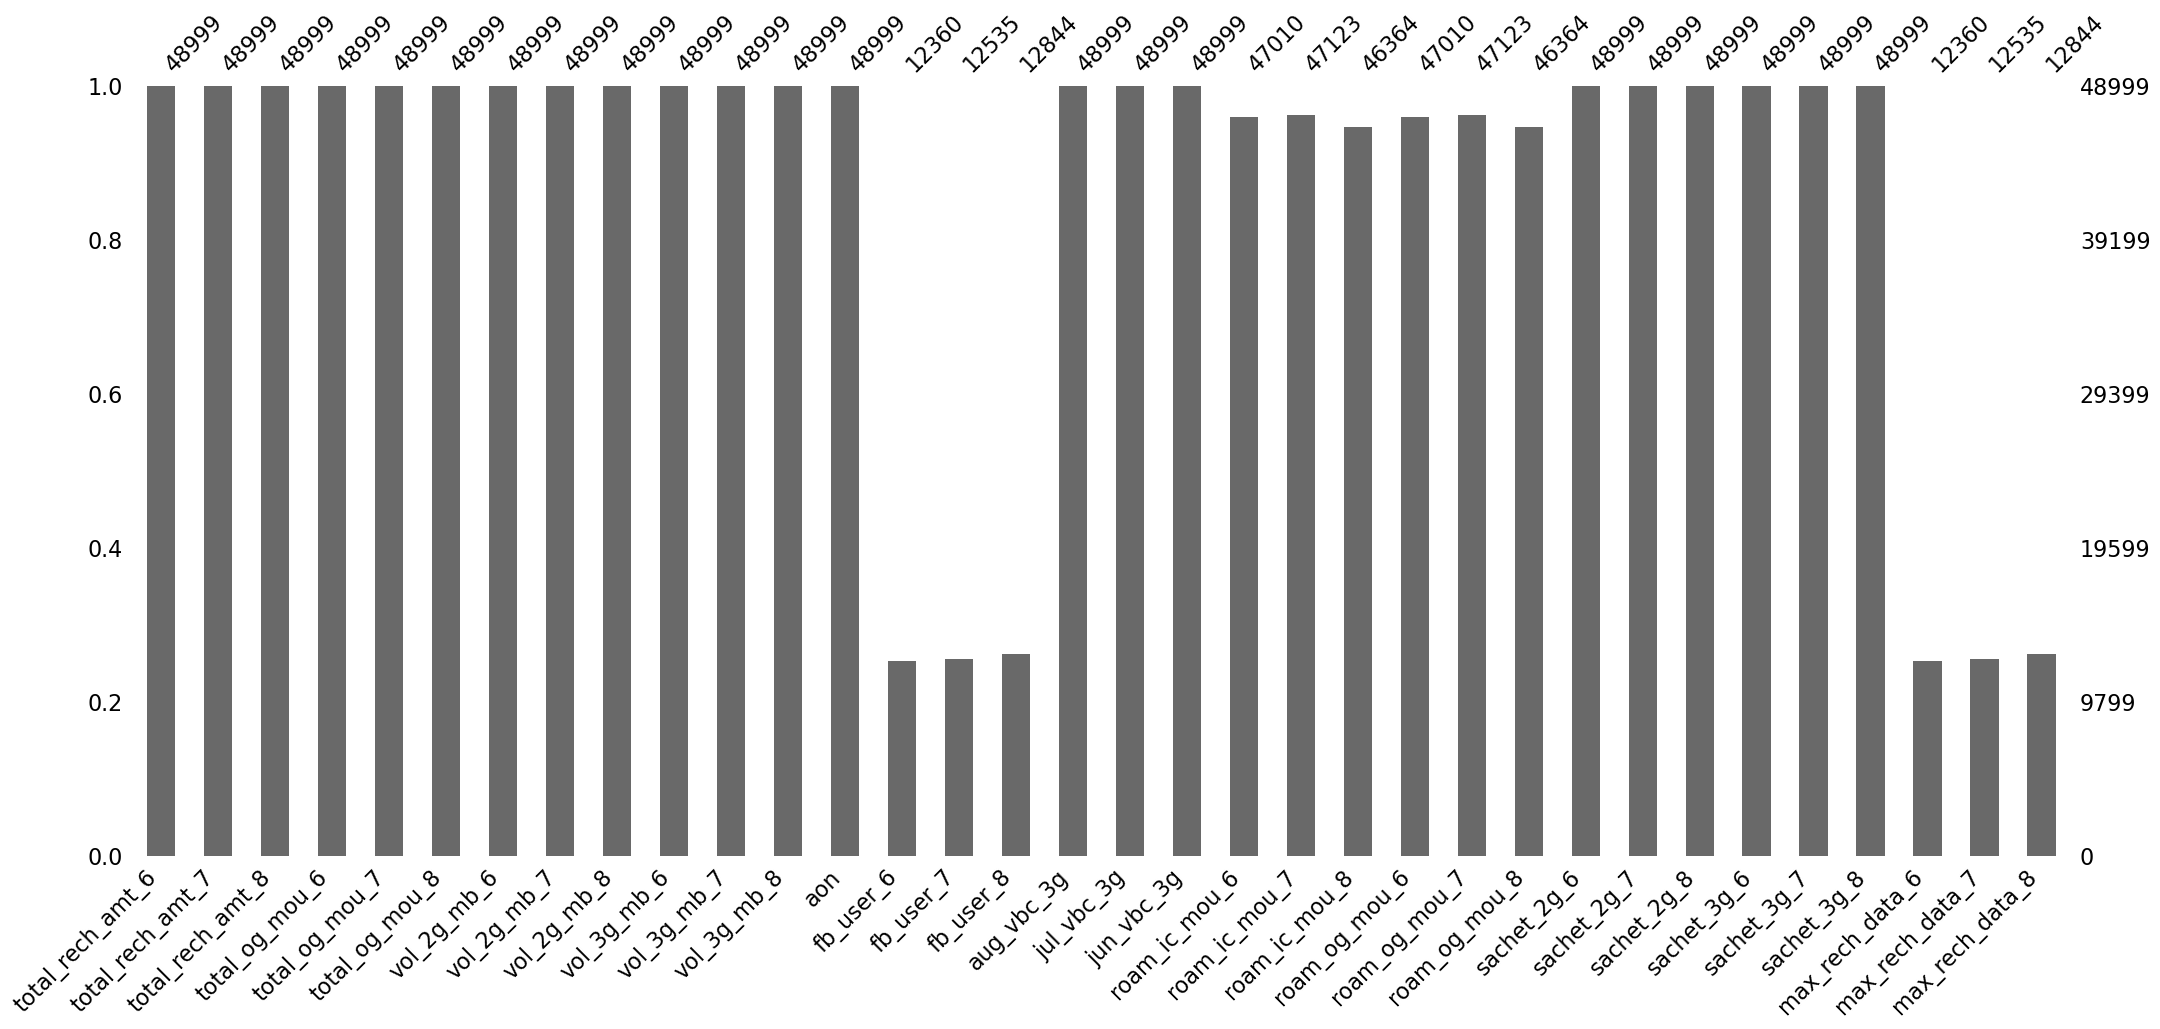

In [28]:
msno.bar(X_train)

In [29]:
null_data = 100*(X_train.isnull().sum())/len(data.index)
null_data

total_rech_amt_6     0.000000
total_rech_amt_7     0.000000
total_rech_amt_8     0.000000
total_og_mou_6       0.000000
total_og_mou_7       0.000000
total_og_mou_8       0.000000
vol_2g_mb_6          0.000000
vol_2g_mb_7          0.000000
vol_2g_mb_8          0.000000
vol_3g_mb_6          0.000000
vol_3g_mb_7          0.000000
vol_3g_mb_8          0.000000
aon                  0.000000
fb_user_6           52.342176
fb_user_7           52.092173
fb_user_8           51.650738
aug_vbc_3g           0.000000
jul_vbc_3g           0.000000
jun_vbc_3g           0.000000
roam_ic_mou_6        2.841469
roam_ic_mou_7        2.680038
roam_ic_mou_8        3.764339
roam_og_mou_6        2.841469
roam_og_mou_7        2.680038
roam_og_mou_8        3.764339
sachet_2g_6          0.000000
sachet_2g_7          0.000000
sachet_2g_8          0.000000
sachet_3g_6          0.000000
sachet_3g_7          0.000000
sachet_3g_8          0.000000
max_rech_data_6     52.342176
max_rech_data_7     52.092173
max_rech_d

In [30]:
var = null_data[null_data.le(20)].index
var

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'sachet_2g_6', 'sachet_2g_7',
       'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8'],
      dtype='object')

In [31]:
var.shape

(28,)

In [32]:
X_train1 = X_train[var]
X_train1.head()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,...,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
id,,,,,,,,,,,,,,,,,,,,,
48645,100,75,125,12.19,25.83,16.53,75.44,52.17,39.68,139.01,...,0.0,11.29,0.0,0.0,8,6,9,0,0,1
54979,110,220,0,60.88,65.98,107.01,0.00,0.00,0.00,0.00,...,0.0,14.39,0.0,0.0,0,0,0,0,0,0
7134,718,717,667,984.03,1124.94,912.09,0.00,0.00,0.00,0.00,...,0.0,0.00,0.0,0.0,0,0,0,0,0,0
6361,0,169,408,40.09,66.68,243.49,0.00,0.00,0.00,0.00,...,0.0,0.00,0.0,0.0,0,0,0,0,0,0
6647,120,158,0,127.13,177.04,108.39,0.00,0.00,0.00,0.00,...,0.0,0.00,0.0,0.0,0,0,0,0,0,0


In [33]:
null_data = X_train1.isnull().any()

In [34]:
imputer = null_data[null_data.gt(0)].index
imputer

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8'],
      dtype='object')

In [35]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='constant', fill_value=0)
X_train1[imputer] = imp.fit_transform(X_train1[imputer])

<Axes: >

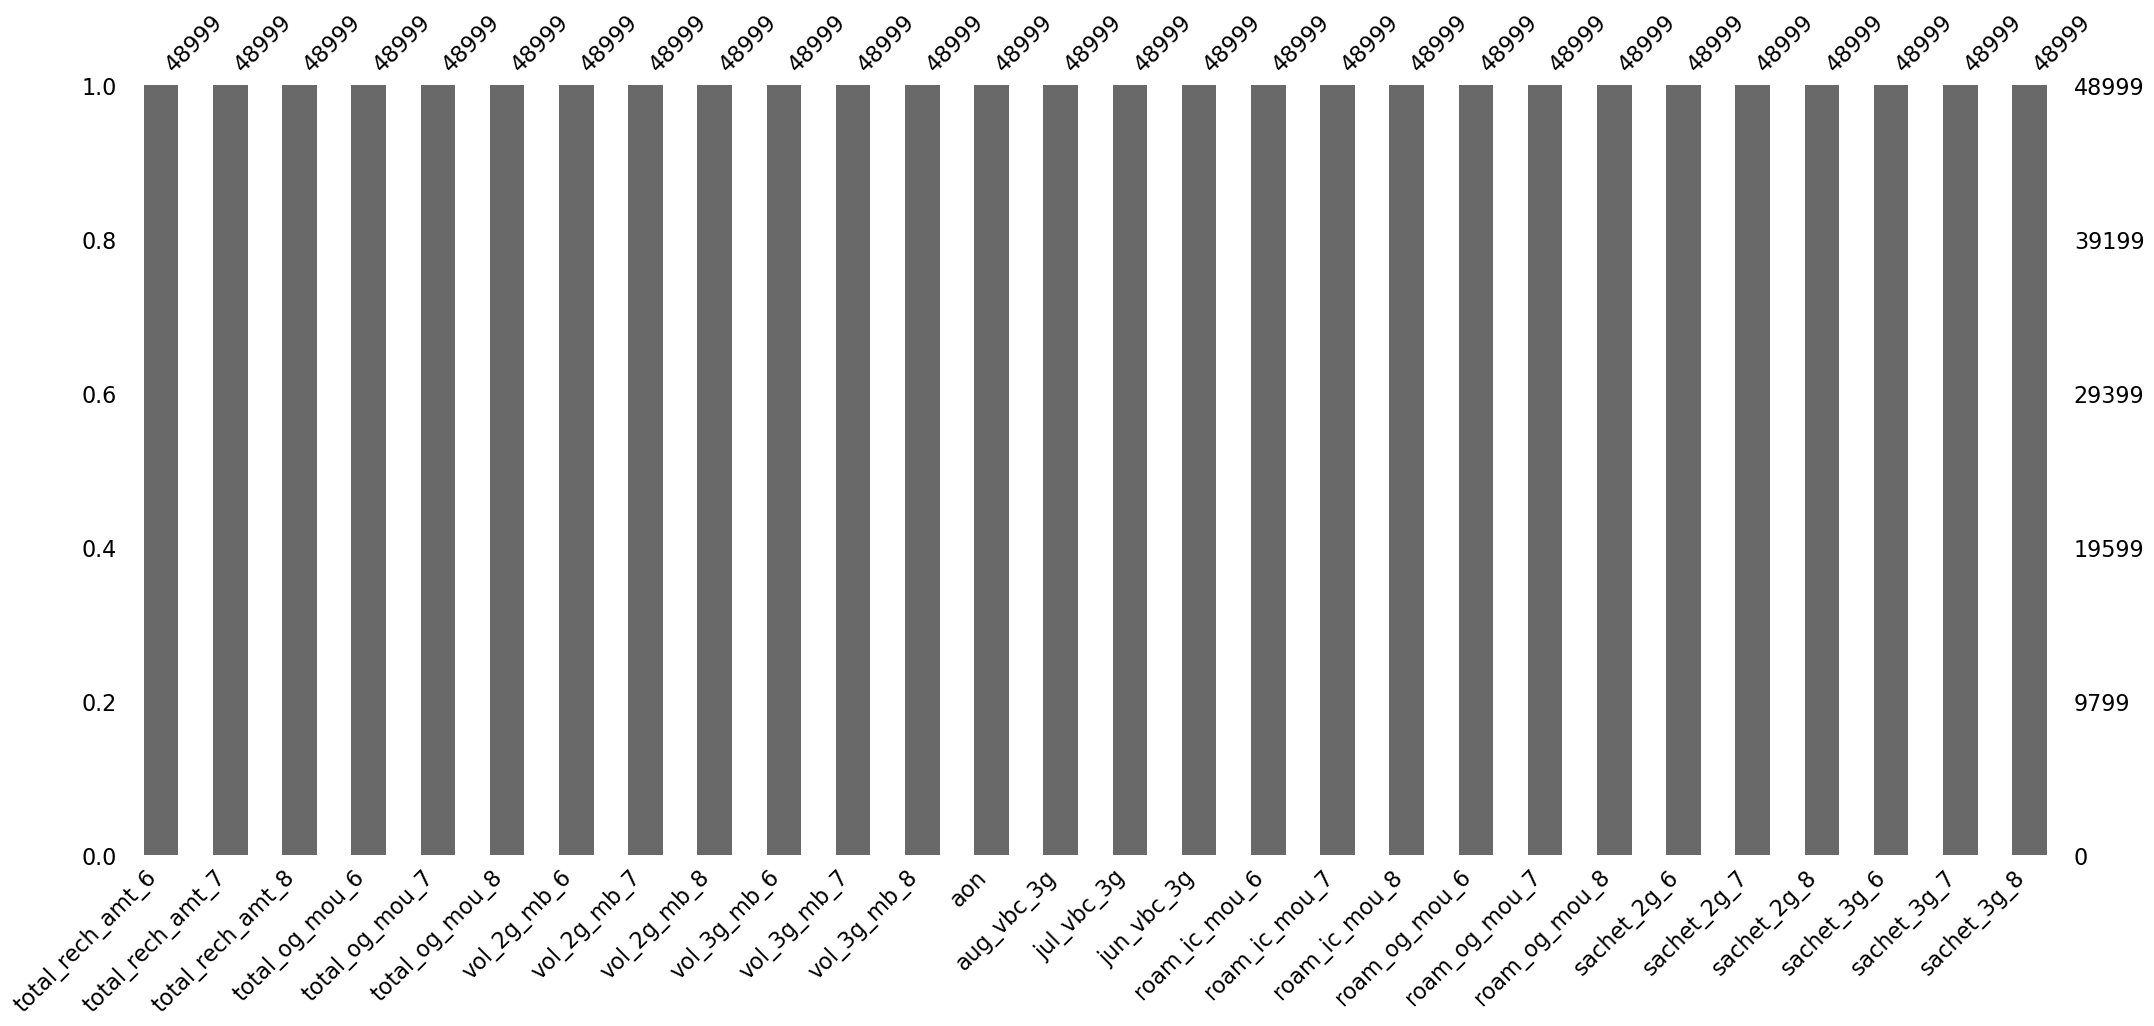

In [36]:
msno.bar(X_train1)

# Handle Outliers

In [37]:
def outliers_handled(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [38]:
X_train2 = X_train1.apply(outliers_handled, axis=0)

**Null values handled**

<Axes: >

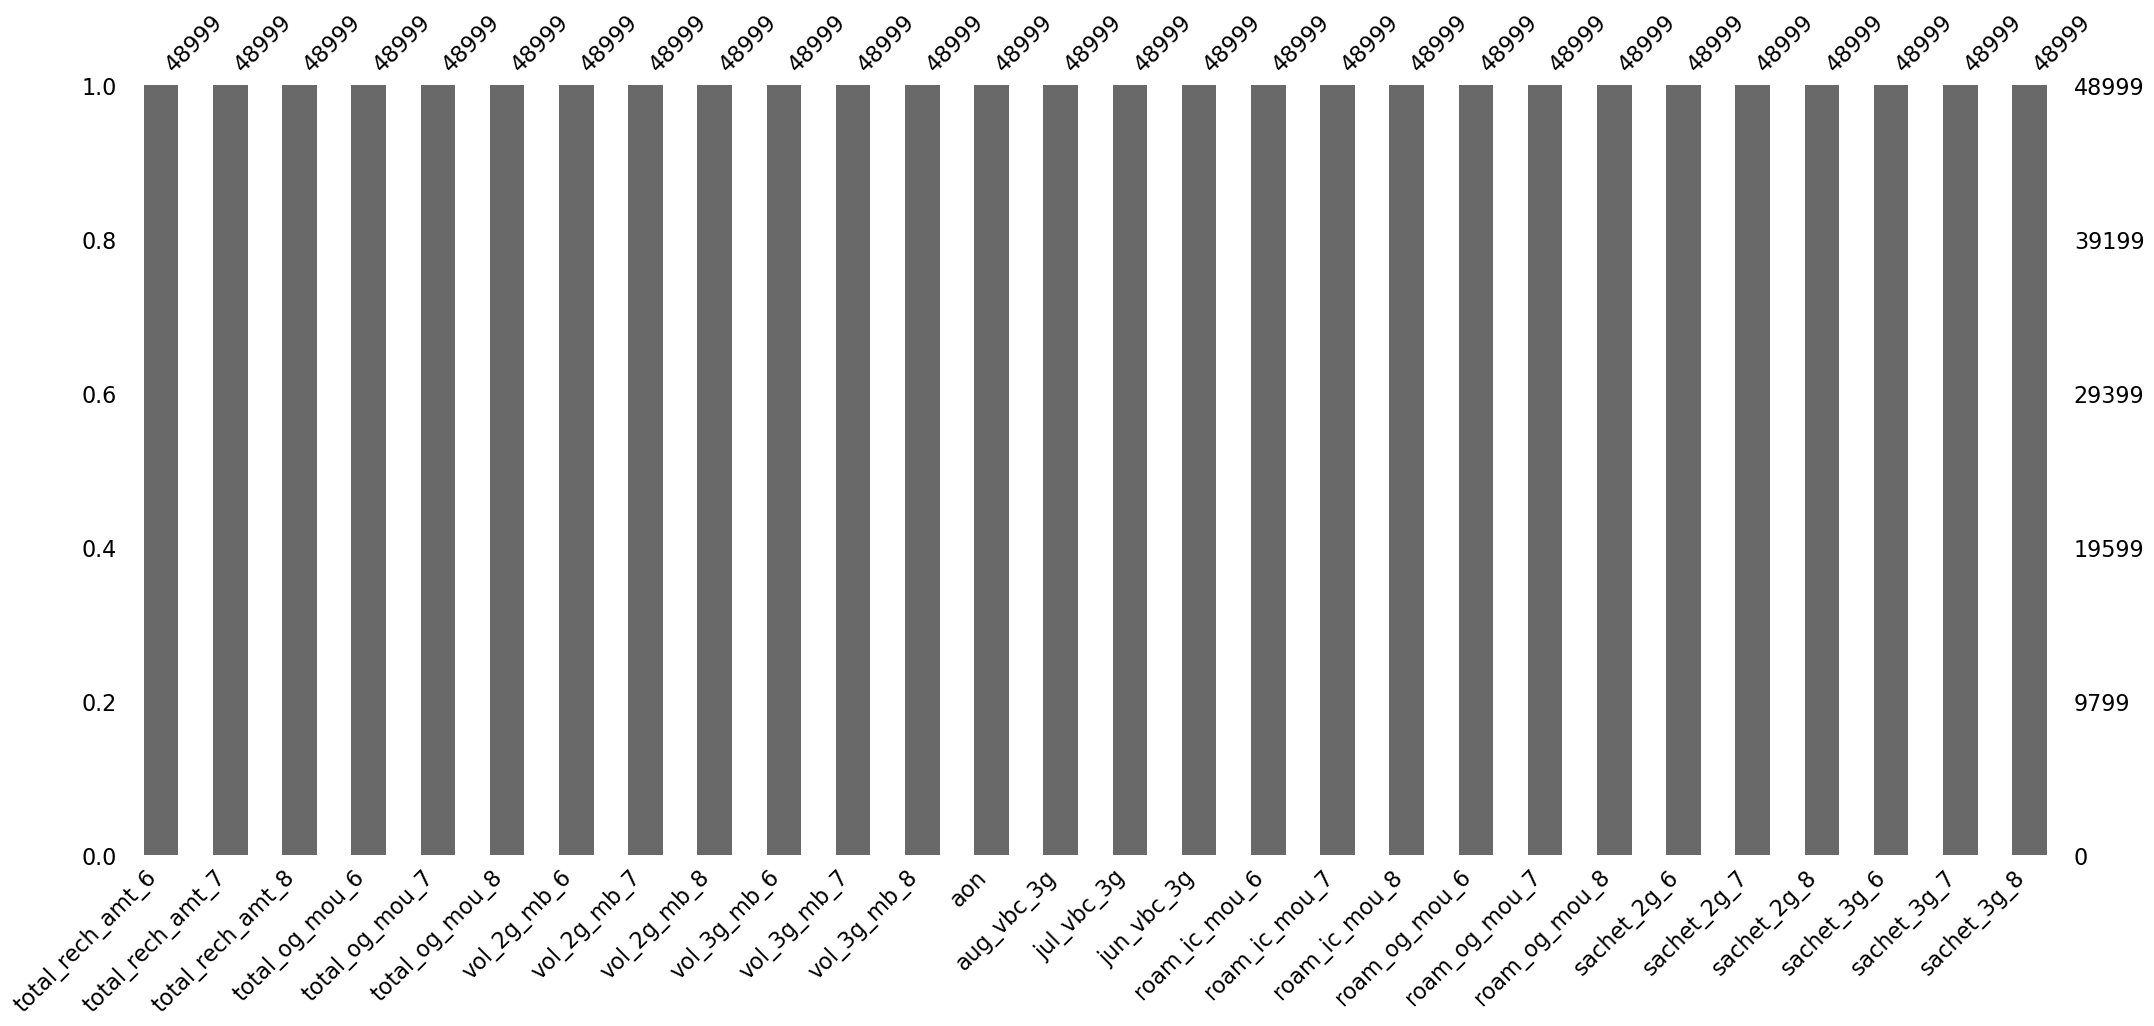

In [39]:
msno.bar(X_train2)

<Axes: >

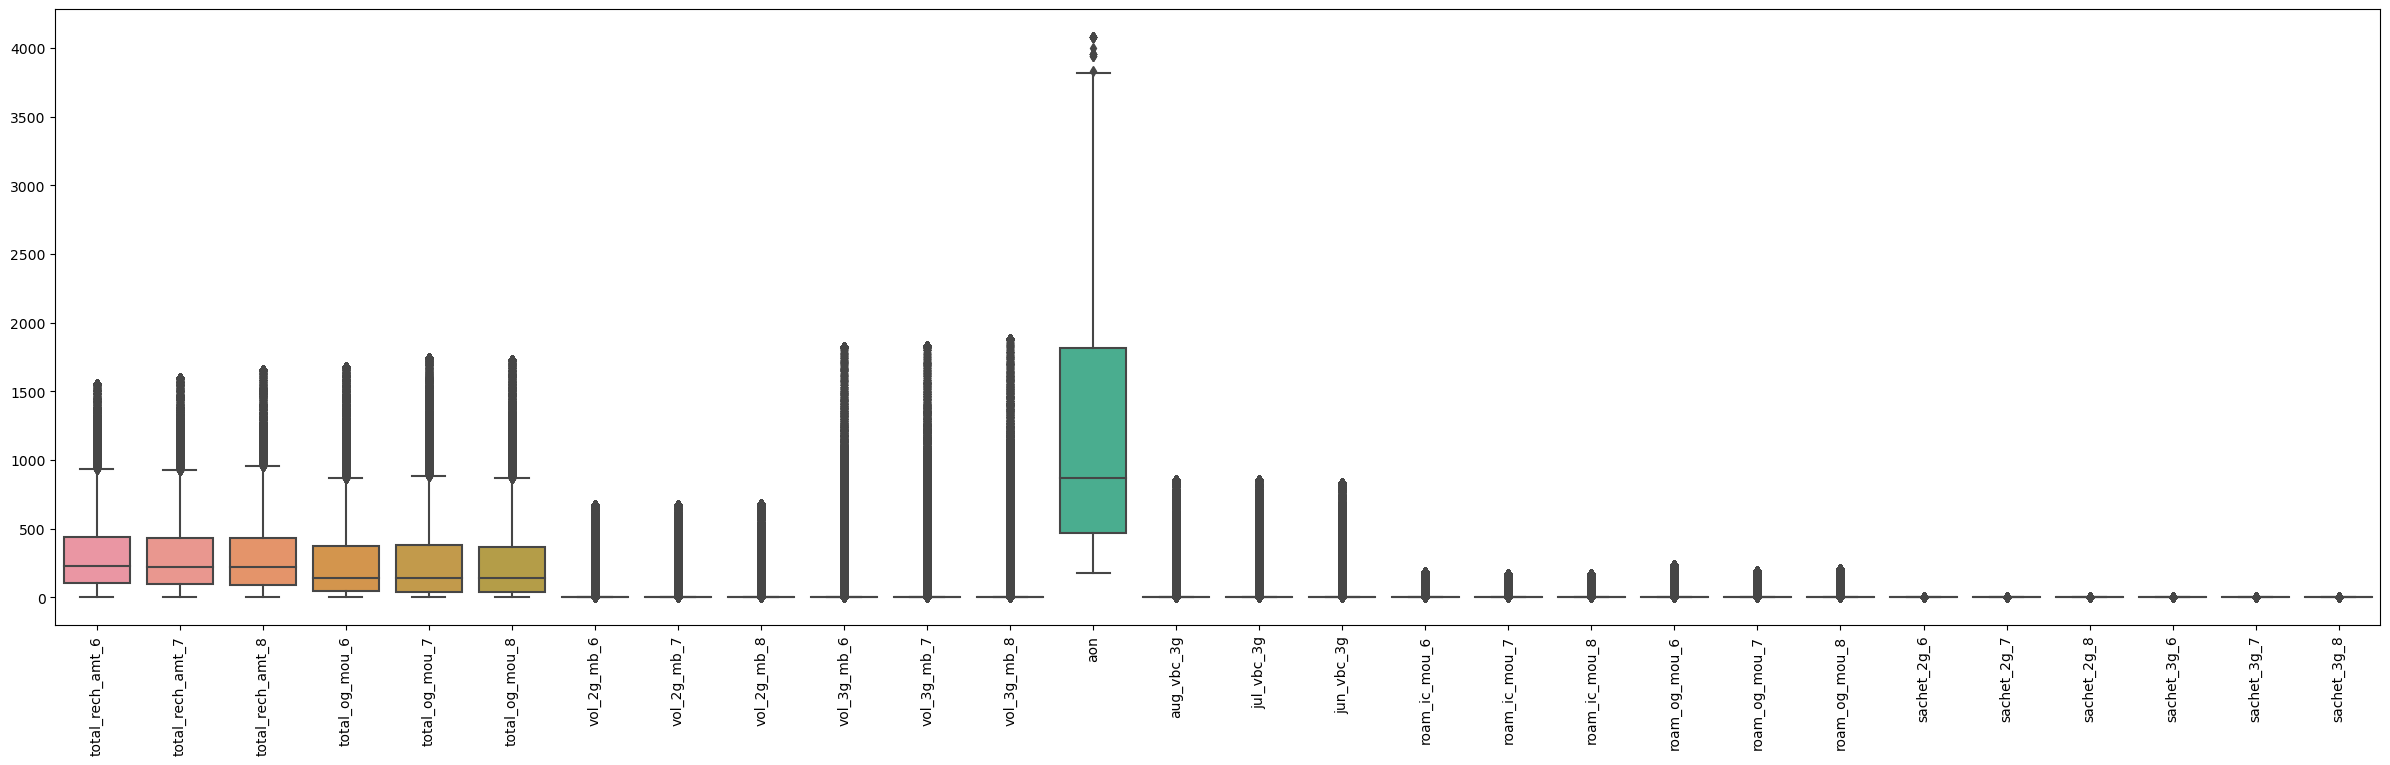

In [40]:
plt.figure(figsize=(30,8))
plt.xticks(rotation=90)
sns.boxplot(data = X_train2)

## Scaling 

In [55]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train3 = scale.fit_transform(X_train2)

<Axes: >

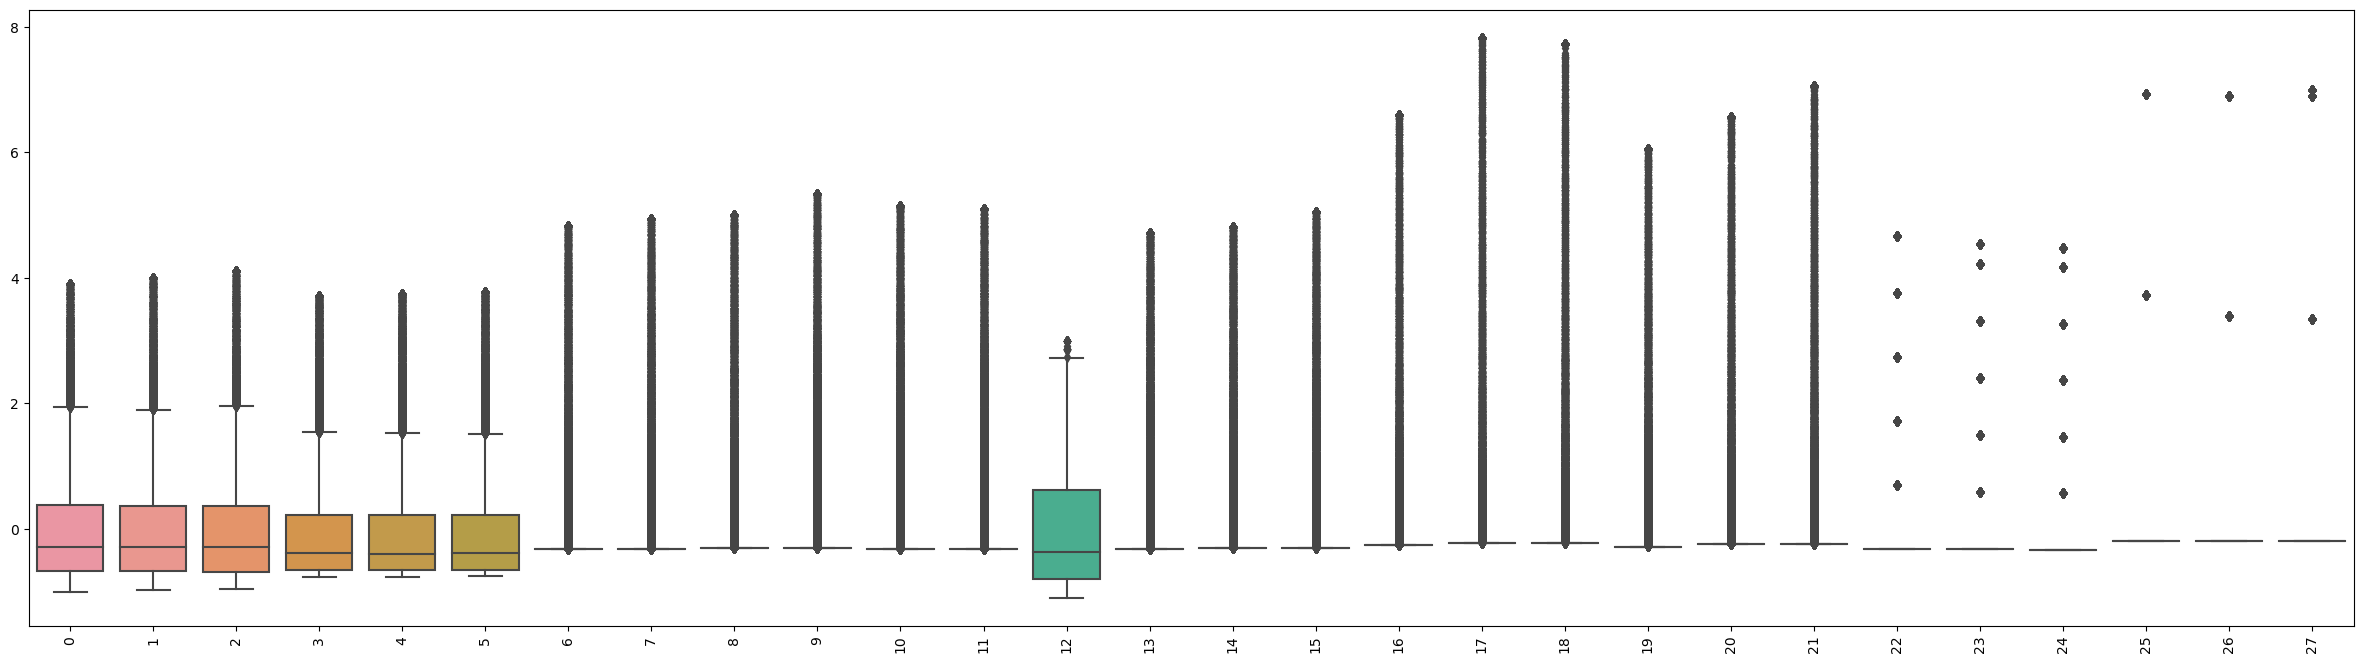

In [56]:
plt.figure(figsize =(30,8))
plt.xticks(rotation = 90)
sns.boxplot(data = X_train3)

# Random Forest Model

**Number of decision tree estimators can be 100**

In [57]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(X_train3, y_train)

RandomForestClassifier(n_jobs=-1)

In [58]:
feature_importances = pd.DataFrame({'col':var, 'importance':rf.feature_importances_})

<BarContainer object of 28 artists>

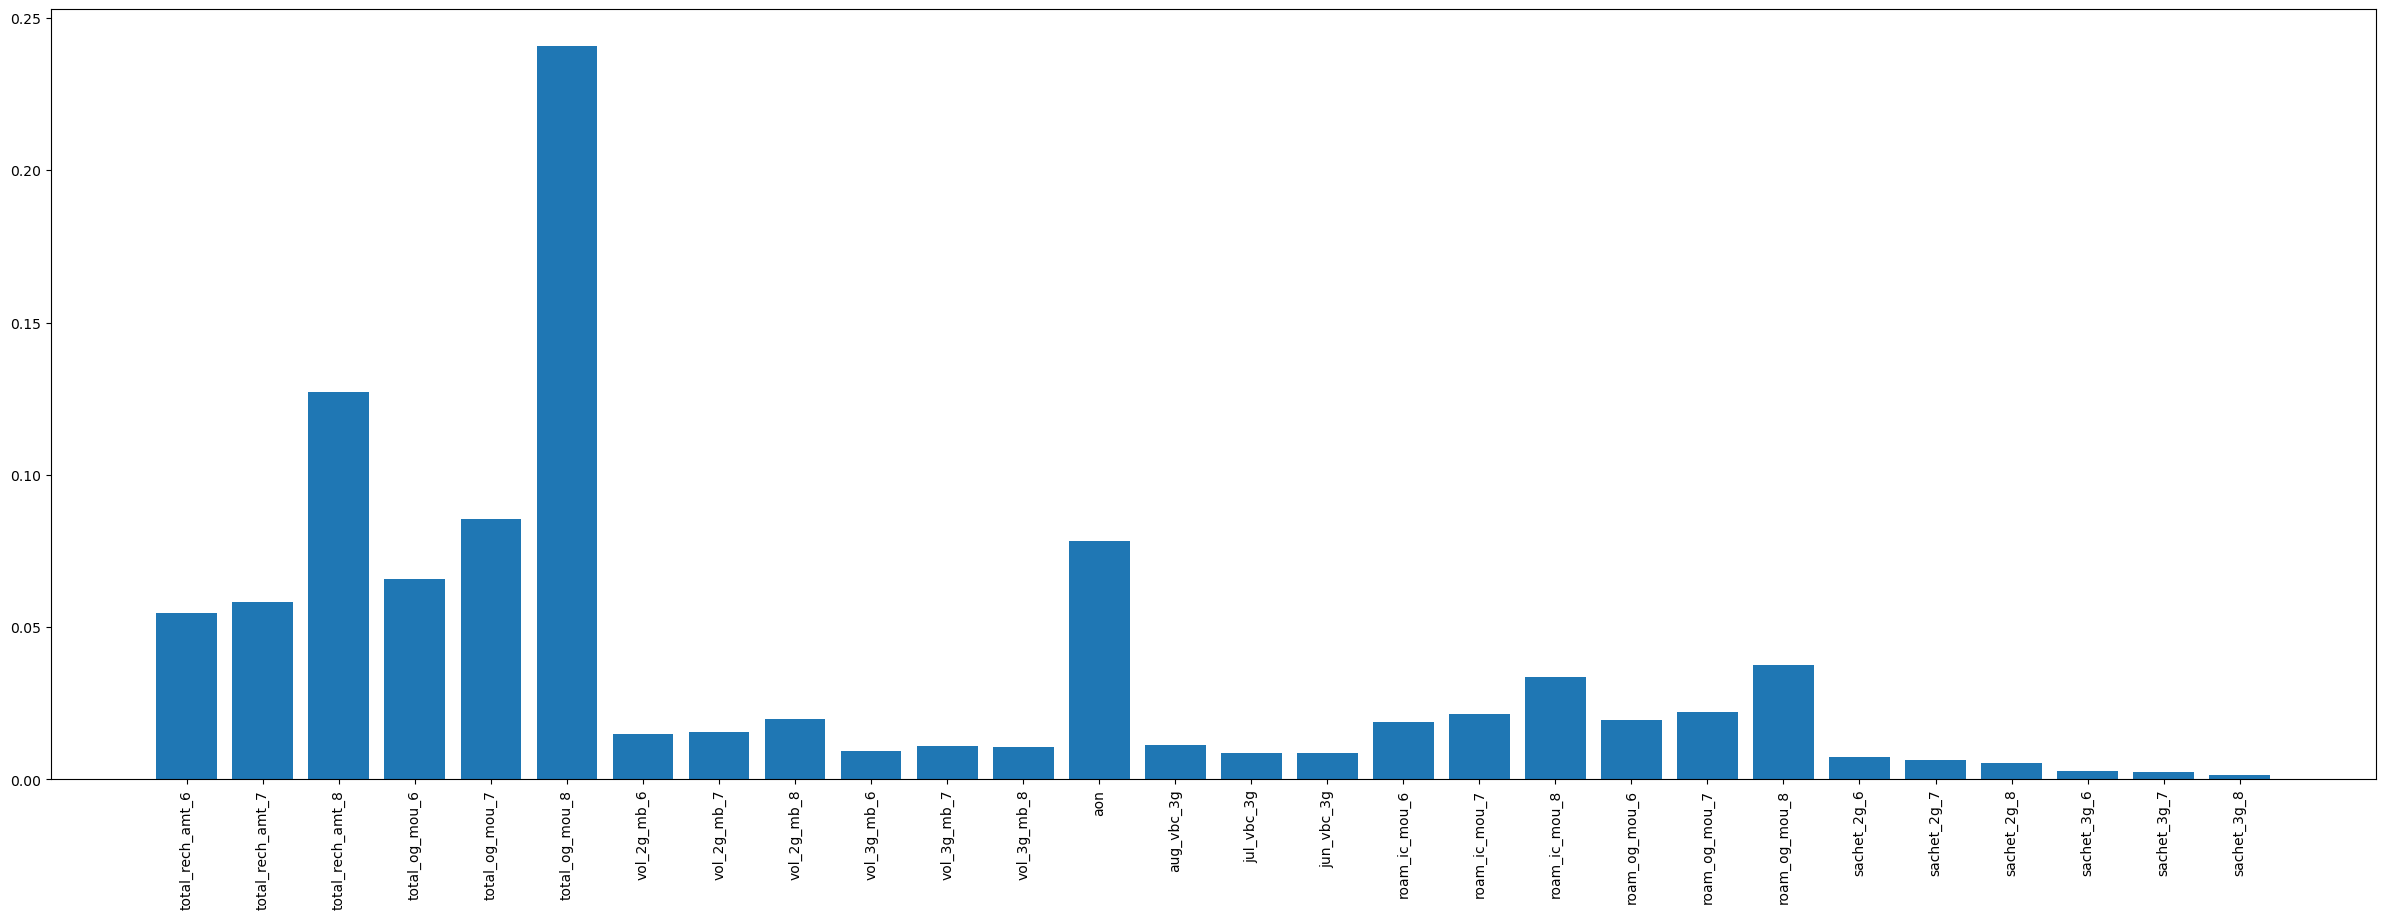

In [59]:
plt.figure(figsize= (30,10))
plt.xticks(rotation=90)
plt.bar(feature_importances['col'], feature_importances['importance'])

# Principal Component Analysis

In [60]:
pca = PCA()
pca_components = pca.fit_transform(X_train3)

<Axes: >

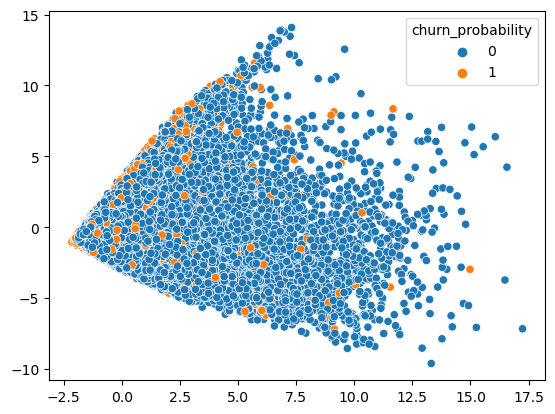

In [61]:
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=y_train)

**Observations**
1. The shifted origin for PCA starts from (-0.6,-1.55) for 1st and 2nd Component

**Random Forest Classifier**

In [62]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(pca_components, y_train)

feature_importances = pd.DataFrame({'col':['component_'+str(i) for i in range(28)], 
                                    'importance':rf.feature_importances_})

<BarContainer object of 28 artists>

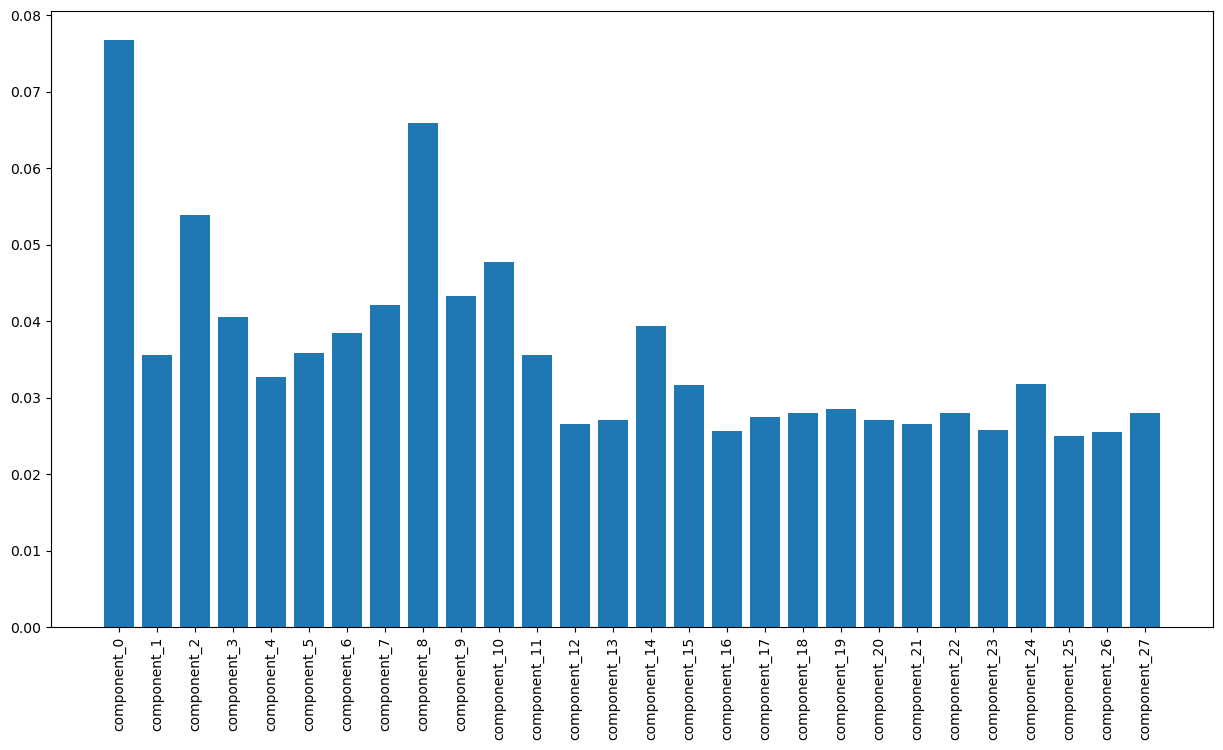

In [63]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
plt.bar(feature_importances['col'], feature_importances['importance'])

# Logistic Regression

**We are taking 2 PCA Components** 

In [64]:
lr = LogisticRegression(max_iter=1000, tol=0.001, solver='sag')
lr.fit(pca_components[:,:2], y_train)

LogisticRegression(max_iter=1000, solver='sag', tol=0.001)

In [65]:
lr.score(pca_components[:,:2], y_train)

0.897283618033021

In [66]:
imp = SimpleImputer(strategy='constant', fill_value=0)
scale = StandardScaler()
pca = PCA(n_components=12)
lr = LogisticRegression(max_iter=1000, tol=0.001)

In [67]:
pipe = Pipeline(steps = [('imputation',imp),
                         ('scaling',scale),
                         ('pca',pca),
                         ('model',lr)])

In [68]:
pipe.fit(X_train[var], y_train)

Pipeline(steps=[('imputation',
                 SimpleImputer(fill_value=0, strategy='constant')),
                ('scaling', StandardScaler()), ('pca', PCA(n_components=12)),
                ('model', LogisticRegression(max_iter=1000, tol=0.001))])

In [69]:
train_score = pipe.score(X_train[var], y_train)
print("Training accuracy:", train_score)

Training accuracy: 0.8989571215739097


In [70]:
test_score = pipe.score(X_test[var], y_test)
print("Test accuracy:", test_score)

Test accuracy: 0.9015238095238095


In [71]:
confusion_matrix(y_train, pipe.predict(X_train[var]))

array([[43728,   238],
       [ 4713,   320]], dtype=int64)

In [72]:
confusion_matrix(y_test, pipe.predict(X_test[var]))

array([[18794,   107],
       [ 1961,   138]], dtype=int64)

In [73]:
precision_score(y_test, pipe.predict(X_test[var]))

0.563265306122449

In [74]:
recall_score(y_test, pipe.predict(X_test[var]))

0.06574559313959027

## Conclusions

**We have taken 2 PCA components**

**Precision Score is 0.56**

**Recall Score is 0.065**

# Creating Submission File

In [509]:
sample = pd.read_csv("S:sample.csv",low_memory = False)

In [510]:
sample.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [511]:
test = pd.read_csv("S:test.csv",low_memory = False)

In [512]:
test.shape

(30000, 171)

In [513]:
test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [514]:
submission_data = test.set_index('id')[var]
submission_data.shape

(30000, 28)

In [515]:
submission_data.head()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,...,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
id,,,,,,,,,,,,,,,,,,,,,
69999,103,90,60,91.94,52.39,57.94,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0,0,0,0,0,0
70000,500,500,500,549.86,663.06,415.59,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0,0,0,0,0,0
70001,500,1000,1000,0.00,0.00,0.00,0.0,0.0,0.0,0.0,...,26.08,24.53,53.68,54.44,0,0,0,0,0,0
70002,110,260,0,45.36,207.18,24.01,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0,0,0,0,0,0
70003,356,490,546,514.79,638.28,779.78,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0,0,0,0,0,0


In [516]:
test['churn_probability'] = pipe.predict(submission_data)
output = test[['id','churn_probability']]
output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [517]:
output.to_csv('submission_1.csv',index=False)

**End**